# Chapter 1: The Machine Learning Landscape

Based on: https://github.com/ageron/handson-ml2/blob/master/01_the_machine_learning_landscape.ipynb

In [1]:
!python --version

Python 3.8.2


In [5]:
# Python ≥3.5 is required
import sys
assert sys.version_info >= (3, 5)
print(sys.version_info)

sys.version_info(major=3, minor=8, micro=2, releaselevel='final', serial=0)


In [6]:
# Scikit-Learn ≥0.20 is required
import sklearn
assert sklearn.__version__ >= "0.20"
print(sklearn.__version__)

0.24.1


In [12]:
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import sklearn.linear_model

## Download dataset

In [7]:
import os
datapath = os.path.join("datasets", "lifesat", "")

In [8]:
# Download the data
import urllib.request
DOWNLOAD_ROOT = "https://raw.githubusercontent.com/ageron/handson-ml2/master/"
os.makedirs(datapath, exist_ok=True)
for filename in ("oecd_bli_2015.csv", "gdp_per_capita.csv"):
    print("Downloading", filename)
    url = DOWNLOAD_ROOT + "datasets/lifesat/" + filename
    urllib.request.urlretrieve(url, datapath + filename)

## Analysing and processing the data

In [13]:
# Load the data
oecd_bli = pd.read_csv(datapath + "oecd_bli_2015.csv", thousands=',')
gdp_per_capita = pd.read_csv(datapath + "gdp_per_capita.csv",thousands=',',delimiter='\t',
                             encoding='latin1', na_values="n/a")

In [14]:
oecd_bli.head()

,LOCATION,Country,INDICATOR,Indicator,MEASURE,Measure,INEQUALITY,Inequality,Unit Code,Unit,PowerCode Code,PowerCode,Reference Period Code,Reference Period,Value,Flag Codes,Flags
0,AUS,Australia,HO_BASE,Dwellings without basic facilities,L,Value,TOT,Total,PC,Percentage,0,units,NaN,NaN,1.1,E,Estimated value
1,AUT,Austria,HO_BASE,Dwellings without basic facilities,L,Value,TOT,Total,PC,Percentage,0,units,NaN,NaN,1.0,NaN,NaN
2,BEL,Belgium,HO_BASE,Dwellings without basic facilities,L,Value,TOT,Total,PC,Percentage,0,units,NaN,NaN,2.0,NaN,NaN
3,CAN,Canada,HO_BASE,Dwellings without basic facilities,L,Value,TOT,Total,PC,Percentage,0,units,NaN,NaN,0.2,NaN,NaN
4,CZE,Czech Republic,HO_BASE,Dwellings without basic facilities,L,Value,TOT,Total,PC,Percentage,0,units,NaN,NaN,0.9,NaN,NaN


In [18]:
gdp_per_capita.columns

Index(['Country', 'Subject Descriptor', 'Units', 'Scale',
       'Country/Series-specific Notes', '2015', 'Estimates Start After'],
      dtype='object')

In [15]:
gdp_per_capita.head()

,Country,Subject Descriptor,Units,Scale,Country/Series-specific Notes,2015,Estimates Start After
0,Afghanistan,"Gross domestic product per capita, current prices",U.S. dollars,Units,"See notes for: Gross domestic product, curren...",599.994,2013.0
1,Albania,"Gross domestic product per capita, current prices",U.S. dollars,Units,"See notes for: Gross domestic product, curren...",3995.383,2010.0
2,Algeria,"Gross domestic product per capita, current prices",U.S. dollars,Units,"See notes for: Gross domestic product, curren...",4318.135,2014.0
3,Angola,"Gross domestic product per capita, current prices",U.S. dollars,Units,"See notes for: Gross domestic product, curren...",4100.315,2014.0
4,Antigua and Barbuda,"Gross domestic product per capita, current prices",U.S. dollars,Units,"See notes for: Gross domestic product, curren...",14414.302,2011.0


In [19]:
def prepare_country_stats(oecd_bli, gdp_per_capita):
    oecd_bli = oecd_bli[oecd_bli["INEQUALITY"]=="TOT"]
    oecd_bli = oecd_bli.pivot(index="Country", columns="Indicator", values="Value")
    gdp_per_capita.rename(columns={"2015": "GDP per capita"}, inplace=True)
    gdp_per_capita.set_index("Country", inplace=True)
    full_country_stats = pd.merge(left=oecd_bli, right=gdp_per_capita,
                                  left_index=True, right_index=True)
    full_country_stats.sort_values(by="GDP per capita", inplace=True)
    remove_indices = [0, 1, 6, 8, 33, 34, 35]
    keep_indices = list(set(range(36)) - set(remove_indices))
    return full_country_stats[["GDP per capita", 'Life satisfaction']].iloc[keep_indices]

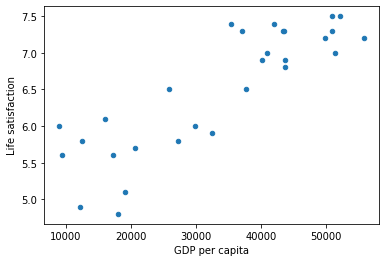

In [20]:
# Prepare the data
country_stats = prepare_country_stats(oecd_bli, gdp_per_capita)
X = np.c_[country_stats["GDP per capita"]]
y = np.c_[country_stats["Life satisfaction"]]

# Visualize the data
country_stats.plot(kind='scatter', x="GDP per capita", y='Life satisfaction')
plt.show()

## Train simple linear model

In [21]:
# Select a linear model
model = sklearn.linear_model.LinearRegression()

# Train the model
model.fit(X, y)

# Make a prediction for Cyprus
X_new = [[22587]]  # Cyprus' GDP per capita
print(model.predict(X_new)) # outputs [[ 5.96242338]]

[[5.96242338]]


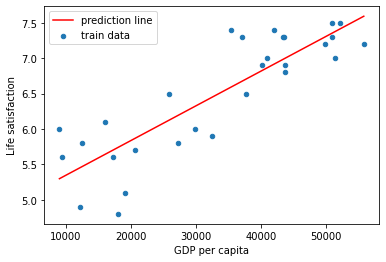

In [88]:
# Predictions for training data
y_pred = model.predict(X)

# Visualize the data
country_stats.plot(kind='scatter', x="GDP per capita", y='Life satisfaction')
plt.plot(X, y_pred, 'r')
plt.legend(['prediction line', 'train data'])
plt.show()

In [89]:
from sklearn.metrics import mean_squared_error
from math import sqrt

mse = mean_squared_error(y, y_pred)
print('mse:', mse)
print('rmse:', sqrt(mse))

mse: 0.18075033705835153
rmse: 0.4251474297915389


## Understanding transformations

In [46]:
oecd_bli = pd.read_csv(datapath + "oecd_bli_2015.csv", thousands=',')
oecd_bli = oecd_bli[oecd_bli["INEQUALITY"]=="TOT"]
oecd_bli.Indicator.value_counts() 
# Life satisfaction is one of the values in the column 'Indicator'

Rooms per person                             37
Self-reported health                         37
Dwellings without basic facilities           37
Job security                                 37
Life satisfaction                            37
Student skills                               37
Employment rate                              37
Consultation on rule-making                  37
Time devoted to leisure and personal care    37
Personal earnings                            37
Air pollution                                37
Educational attainment                       37
Household net adjusted disposable income     37
Employees working very long hours            37
Homicide rate                                37
Long-term unemployment rate                  37
Assault rate                                 37
Years in education                           37
Voter turnout                                37
Water quality                                37
Life expectancy                         

### Pivot function (pandas)

> The pivot function (from pandas) turns a dataframe into another using only the indicating information.
> 
> `index`: column to be used as index for new dataframe
> `columns`: column whose values will be the columns in the new dataframe
> `values`: column to populate new frame (each a combination of `(index, column)`)

In [47]:
help(pd.pivot)

Help on function pivot in module pandas.core.reshape.pivot:

pivot(data: 'DataFrame', index: Union[Hashable, NoneType, Sequence[Union[Hashable, NoneType]]] = None, columns: Union[Hashable, NoneType, Sequence[Union[Hashable, NoneType]]] = None, values: Union[Hashable, NoneType, Sequence[Union[Hashable, NoneType]]] = None) -> 'DataFrame'
    Return reshaped DataFrame organized by given index / column values.
    
    Reshape data (produce a "pivot" table) based on column values. Uses
    unique values from specified `index` / `columns` to form axes of the
    resulting DataFrame. This function does not support data
    aggregation, multiple values will result in a MultiIndex in the
    columns. See the :ref:`User Guide <reshaping>` for more on reshaping.
    
    Parameters
    ----------
    data : DataFrame
    index : str or object or a list of str, optional
        Column to use to make new frame's index. If None, uses
        existing index.
    
        .. versionchanged:: 1.1.0
  

In [49]:
#oecd_bli[["Country", "Indicator", "Value"]].tail(20)
indicators_per_country = oecd_bli.pivot(index="Country", columns="Indicator", values="Value")
indicators_per_country.head(2)

Indicator,Air pollution,Assault rate,Consultation on rule-making,Dwellings without basic facilities,Educational attainment,Employees working very long hours,Employment rate,Homicide rate,Household net adjusted disposable income,Household net financial wealth,...,Long-term unemployment rate,Personal earnings,Quality of support network,Rooms per person,Self-reported health,Student skills,Time devoted to leisure and personal care,Voter turnout,Water quality,Years in education
Country,,,,,,,,,,,,,,,,,,,,,
Australia,13.0,2.1,10.5,1.1,76.0,14.02,72.0,0.8,31588.0,47657.0,...,1.08,50449.0,92.0,2.3,85.0,512.0,14.41,93.0,91.0,19.4
Austria,27.0,3.4,7.1,1.0,83.0,7.61,72.0,0.4,31173.0,49887.0,...,1.19,45199.0,89.0,1.6,69.0,500.0,14.46,75.0,94.0,17.0


In [51]:
indicators_per_country.columns

Index(['Air pollution', 'Assault rate', 'Consultation on rule-making',
       'Dwellings without basic facilities', 'Educational attainment',
       'Employees working very long hours', 'Employment rate', 'Homicide rate',
       'Household net adjusted disposable income',
       'Household net financial wealth', 'Housing expenditure', 'Job security',
       'Life expectancy', 'Life satisfaction', 'Long-term unemployment rate',
       'Personal earnings', 'Quality of support network', 'Rooms per person',
       'Self-reported health', 'Student skills',
       'Time devoted to leisure and personal care', 'Voter turnout',
       'Water quality', 'Years in education'],
      dtype='object', name='Indicator')

In [72]:
# Listing countries by descending order of life satisfaction
sorted_life_satisfaction = (
    indicators_per_country['Life satisfaction']
    .sort_values(ascending=False)
    .reset_index()
)
sorted_life_satisfaction.set_index(np.arange(1, 38), inplace=True)
sorted_life_satisfaction

,Country,Life satisfaction
1,Iceland,7.5
2,Switzerland,7.5
3,Denmark,7.5
4,Norway,7.4
5,Finland,7.4
6,Israel,7.4
7,Australia,7.3
8,Canada,7.3
9,New Zealand,7.3
10,Netherlands,7.3
